# PhaseNet模型运行代码

## 1.函数解析
### (原代码由上至下依次解析)

* argparse： 是python自带的命令行参数解析包，可以用来方便地读取命令行参数。<br>
举例：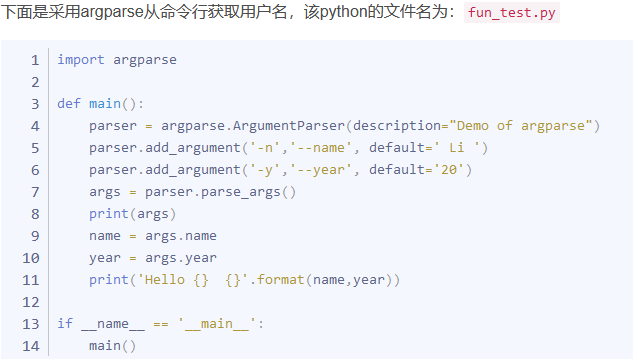
more:http://www.baidu.com/link?url=ckLal3VUqs-hciPcPHaV5TfToQeOwIUy7SKfoBWFK4mnnFmOL3CFt5bg4OP2uQLUyqpISKaVsuWuZhhO0ji8UECKz1D3J7jSaVyzGpw_HaG&wd=&eqid=f49815190001b40c000000036018c688

* import 模块：导入一个模块，注：相当于导入的是一个文件夹，每次使用模块中的函数都要确定引用;<br>
  from…import模块：导入的是一个模块中的一个函数；注：相当于导入的是一个文件夹中的文件，是绝对路径.<br>
  from…import * 模块：是把一个模块中所有的函数都导入进来, 注：相当于导入的是一个文件夹中的所有文件，所有函数都是绝对路径.<br>

* 运行参数设定：<br>
 1）epoch：周期=100;<br>
 2）batch_size:每个周期选择的数据=200;<br>
 3）learning_rate:学习速率=0.01；<br>
 4）decay_step：衰减步长=-1；<br>
 5）decay_rate：衰减率=0.9；<br>
 6）momentum：动量=0.8；<br>
 7）depth：深度=5；<br>
 8）kernel_size：卷积核大小=[7,1]；<br>
 9）pool_size：池化大小（步长）=4；<br>
 10）dilation_rate：膨胀率=[1,1];<br>
 11）loss_type：损失函数=交叉熵；<br>
 12）optimizer：优化算法=ADAM；<br>
 13）class_weights：权重初始值=[1,1,1]；<br>
 14）tp_prob：P波拾取阈值=0.3；<br>
 15）ts_prob：S波拾取阈值=0.3；<br>

* nargs参数个数:
  * nargs='*' :表示参数可设置零个或多个
  * nargs=' '+' :表示参数可设置一个或多个
  * nargs='?'　:表示参数可设置零个或一个

* Python time strftime() 函数:接收以时间元组，并返回以可读字符串表示的当地时间，格式由参数format决定。<br>
  time.strftime(format[, t]):format-格式字符串；t-可选的参数t是一个struct_time对象。<br>
  %y 两位数的年份表示（00-99）<br>
  %Y 四位数的年份表示（000-9999）<br>
  %m 月份（01-12）<br>
  %d 月内中的一天（0-31）<br>
  %H 24小时制小时数（0-23）<br>
  %I 12小时制小时数（01-12）<br>
  %M 分钟数（00=59）<br>
  %S 秒（00-59）<br>
  %a 本地简化星期名称<br>
  %A 本地完整星期名称<br>
  %b 本地简化的月份名称<br>
  %B 本地完整的月份名称<br>
  %c 本地相应的日期表示和时间表示<br>
  %j 年内的一天（001-366）<br>
  %p 本地A.M.或P.M.的等价符<br>
  %U 一年中的星期数（00-53）星期天为星期的开始<br>
  %w 星期（0-6），星期天为星期的开始<br>
  %W 一年中的星期数（00-53）星期一为星期的开始<br>
  %x 本地相应的日期表示<br>
  %X 本地相应的时间表示<br>
  %Z 当前时区的名称<br>
  %% %号本身<br>

* os.path.join()函数：连接两个或更多的路径名组件<br>
   1.如果各组件名首字母不包含’/’，则函数会自动加上<br>
   2.如果有一个组件是一个绝对路径，则在它之前的所有组件均会被舍弃<br>
   3.如果最后一个组件为空，则生成的路径以一个’/’分隔符结尾<br>
   more examples:https://blog.csdn.net/hduxiejun/article/details/80289476


* os.makedirs()函数:语法格式：os.makedirs(name, mode=0o777, exist_ok=False)<br>
  1)递归目录创建函数，和mkdir()很像，但是所有中间级目录都要包含叶目录。<br>
  2)递归创建目录，题中应有之意即路径中哪一层不存在，则自动创建。<br>
  3)区别于os.mkdir(path, mode=0o777, *, dir_fd=None)，只创建最后一层的目录。<br>
  4)name:所要创建的目录；<br>
  参数mode传递给mkdir()；<br>
  如果exist_ok是False（默认），当目标目录（即要创建的目录）已经存在，会抛出一个OSError。<br>

* tensorflow中使用tf.ConfigProto()配置Session运行参数&&GPU设备指定<br>
  1. 记录设备指派情况 :  tf.ConfigProto(log_device_placement=True)<br>
     设置tf.ConfigProto()中参数log_device_placement = True ,可以获取到 operations 和 Tensor 被指派到哪个设备(几号CPU或几号GPU)上运行,会在终端打印出各项操作是在哪个设备上运行的。<br>
  2. 自动选择运行设备 ： tf.ConfigProto(allow_soft_placement=True)<br>
     在tf中，通过命令 "with tf.device('/cpu:0'):",允许手动设置操作运行的设备。如果手动设置的设备不存在或者不可用，就会导致tf程序等待或异<常，为了防止这种情况，可以设置tf.ConfigProto()中参数allow_soft_placement=True，允许tf自动选择一个存在并且可用的设备来运行操作。<br>
  3. 限制GPU资源使用：<br>
     为了加快运行效率，TensorFlow在初始化时会尝试分配所有可用的GPU显存资源给自己，这在多人使用的服务器上工作就会导致GPU占用，别人无法使用GPU工作的情况。<br>
  * 动态申请内存：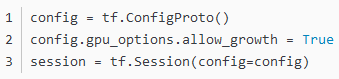
  * 限制GPU使用率：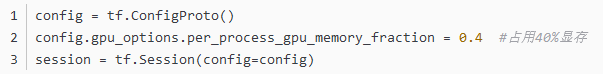
  

* TensorFlow：tf.train.Saver()模型保存与恢复<br>
  1.保存：将训练好的模型参数保存起来，以便以后进行验证或测试。<br>
  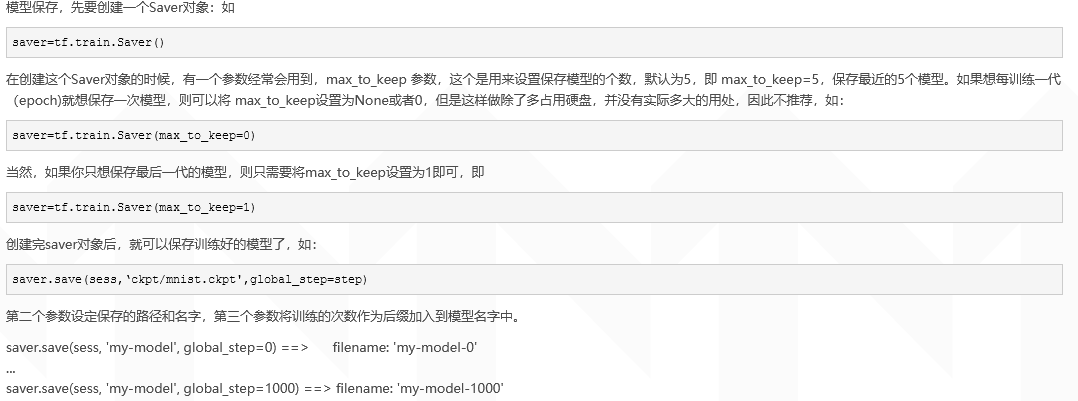
  2.恢复：用saver.restore()方法恢复变量：<br>
  saver.restore(sess,'ckpt.model_checkpoint_path')<br>
  sess：表示当前会话，之前保存的结果将被加载入这个会话；<br>
  ckpt.model_checkpoint_path：表示模型存储的位置，不需要提供模型的名字，它会去查看checkpoint文件，看看最新的是谁，叫做什么。<br>
  more:https://blog.csdn.net/hustqb/article/details/80776306

* tf.train.latest_checkpoint()函数的作用查找最新保存的checkpoint文件的文件名(Finds the filename of latest saved checkpoint file.)<br>
  tf.train.latest_checkpoint(checkpoint_dir,latest_filename=None):经常与模型加载函数checkpoint.restore()共同使用。

* Python多线程编程(一）：threading 模块 Thread 类的用法详解<br>
  处理并发的手段有采用多进程和多线程。<br>
  链接;https://blog.csdn.net/briblue/article/details/85101144

* Python进程池multiprocessing.Pool的用法<br><br>
  1.multiprocessing模块:提供了一个Process类来代表一个进程对象，multiprocessing模块像线程一样管理进程，这个是multiprocessing的核心，它与threading很相似，对多核CPU的利用率会比threading好的多.<br>
  **python 多进程multiprocessing 模块常用方法：<br>**
  * （1）cpu_count():统计cpu核数<br>
    multiprocessing.cpu_count()<br>
  * （2）active_children() 获取所有子进程<br>
    multiprocessing.active_children()<br>
  * （3）preces() 创建一个进程对象<br>
    multiprocessing.Preces(target=function_name, args=())：target: 函数名；args: 函数需要的参数，以tuple形式传入，一个参数时需（1，）。<br>
     * **Preces 常用方法：<br>**
       1）is_alive() 判断进程是否存在；<br>
       2）run() 启动进程；<br>
       3）start() 启动进程，会自动调用run方法，这个常用<br>
       4）join([timeout]) 等待进程结束或者直到超时<br>
    转载：https://www.cnblogs.com/lijunjiang2015/p/8056971.html<br><br>
  2.Pool类:可以提供指定数量的进程供用户调用，当有新的请求提交到Pool中时，如果池还没有满，就会创建一个新的进程来执行请求。如果池满，请求就会告知先等待，直到池中有进程结束，才会创建新的进程来执行这些请求.<br>
  下面介绍一下multiprocessing 模块下的Pool类下的几个方法：<br>
   * 1.apply()<br>
     函数原型：apply(func[, args=()[, kwds={}]])<br>
     该函数用于传递不定参数，同python中的apply函数一致，主进程会被阻塞直到函数执行结束（不建议使用，并且3.x以后不再出现）<br>
   * 2.apply_async<br>
     函数原型：apply_async(func[, args=()[, kwds={}[, callback=None]]])<br>
     与apply用法一致，但它是非阻塞的且支持结果返回后进行回调<br>
   * 3.map()<br>
    函数原型：map(func, iterable[, chunksize=None])<br>
    Pool类中的map方法，与内置的map函数用法行为基本一致，它会使进程阻塞直到结果返回<br>
    注意：虽然第二个参数是一个迭代器，但在实际使用中，必须在整个队列都就绪后，程序才会运行子进程<br>
   * 4.map_async()<br>
    函数原型：map_async(func, iterable[, chunksize[, callback]])<br>
    与map用法一致，但是它是非阻塞的<br>
   * 5.close()<br>
    关闭进程池（pool），使其不再接受新的任务<br>
   * 6.terminal()<br>
    结束工作进程，不再处理未处理的任务<br>
   * 7.join()<br>
    主进程阻塞等待子进程的退出， join方法要在close或terminate之后使用<br>
more examples:https://www.cnblogs.com/ailiailan/p/11850710.html

* tqdm 是一个快速，可扩展的Python进度条，可以在 Python 长循环中添加一个进度提示信息，用户只需要封装任意的迭代器 tqdm(iterator)

* tensorflow载入数据的三种方式
https://blog.csdn.net/lujiandong1/article/details/53376802

* if not 有三种表达方式:<br>
  第一种是`if x is None`；<br>
  第二种是 `if not x：`；<br>
  第三种是`if not x is None`（这句这样理解更清晰`if not (x is None)`） <br>
  注意：[]不等于None类型，也就是x==[]和x==None<br>
  在Python中，None、空列表[]、空字典{}、空元组()、0等一系列代表空和无的对象会被转换成False。除此之外的其它对象都会被转化成True。<br>
  转载：https://blog.51cto.com/weiruoyu/2312719

* Python 队列（Queue）用法：Python的Queue模块中提供了同步的、线程安全的队列类，包括FIFO（先入先出)队列Queue，LIFO（后入先出）队列LifoQueue，和优先级队列PriorityQueue。这些队列都实现了锁原语，能够在多线程中直接使用。可以使用队列来实现线程间的同步。<br>
  常用方法：
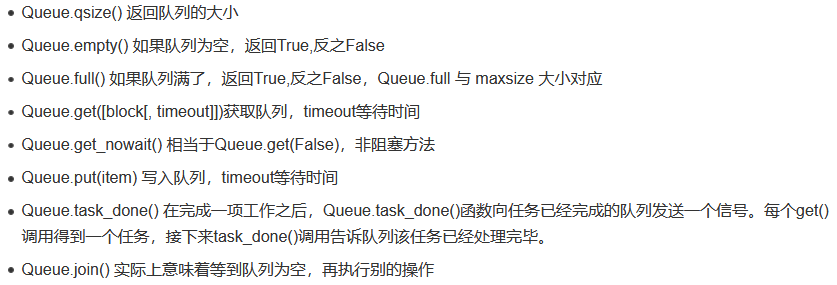
deque:双边队列<br>
转载：https://blog.csdn.net/weixin_43533825/article/details/89155648

* Python time sleep() 函数：推迟调用线程的运行，可通过参数secs指秒数，表示进程挂起的时间。<br>
  time.sleep(t)：t-推迟执行的秒数，无返回值。<br>
  举例：<br>
  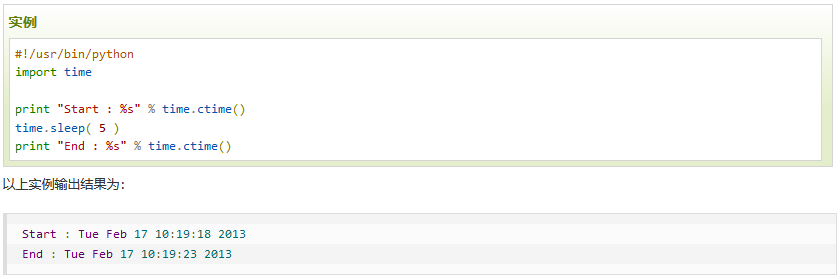

* logging模块是Python内置的标准模块，主要用于输出运行日志，可以设置输出日志的等级、日志保存路径、日志文件回滚等.<br>
  python中配置logging有三种方式：<br>
  * 第一种：基础配置，logging.basicConfig(filename="config.log",filemode="w",format="%(asctime)s-%(name)s-%(levelname)s-%(message)s",level=logging.INFO)。<br>
  * 第二种：使用配置文件的方式配置logging,使用fileConfig(filename,defaults=None,disable_existing_loggers=Ture )函数来读取配置文件。<br>
  * 第三种：使用一个字典方式来写配置信息，然后使用dictConfig(dict,defaults=None, disable_existing_loggers=Ture )函数来瓦按成logging的配置.<br>
实例代码：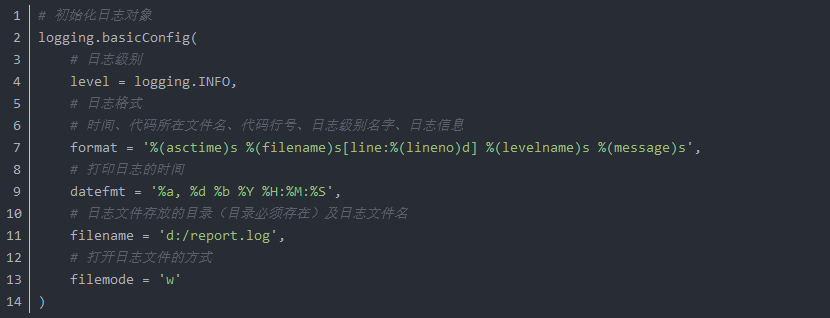
转载：https://blog.csdn.net/qq_30758629/article/details/80840230 

* tf.train.Coordinator：
  * TensorFlow的Session对象是支持多线程的，可以在同一个会话（Session）中创建多个线程，并行执行。
    在Session中的所有线程都必须能被同步终止，异常必须能被正确捕获并报告，会话终止的时候， 队列必须能被正确地关闭。

  * TensorFlow提供了两个类来实现对Session中多线程的管理：tf.Coordinator和 tf.QueueRunner，这两个类往往一起使用。
    Coordinator类用来管理在Session中的多个线程，可以用来同时停止多个工作线程并且向那个在等待所有工作线程终止的程序报告异常，该线程捕获到这个异常之后就会终止所有线程。使用 tf.train.Coordinator()来创建一个线程管理器（协调器）对象。
    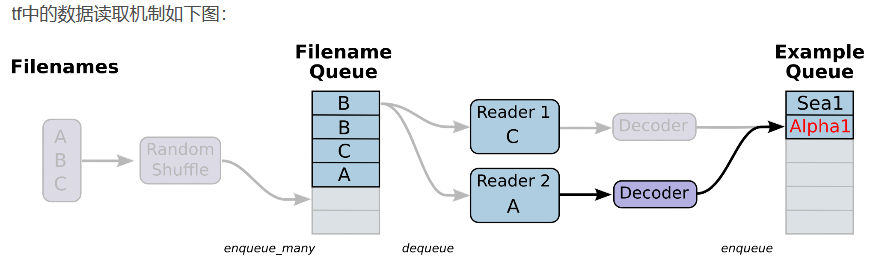
转载;more:https://blog.csdn.net/weixin_42052460/article/details/80714539

* Python中if __name__ == '__main__'：<br>
  一个python的文件有两种使用的方法:<br>
  * 第一是直接作为脚本执行，<br>
  * 第二是import到其他的python脚本中被调用（模块重用）执行。<br>
  因此if __name__ == 'main': 的作用就是控制这两种情况执行代码的过程，在if __name__ == 'main': 下的代码只有在第一种情况下（即文件作为脚本直接执行）才会被执行，而import到其他脚本中是不会被执行的。<br>
通俗理解：
  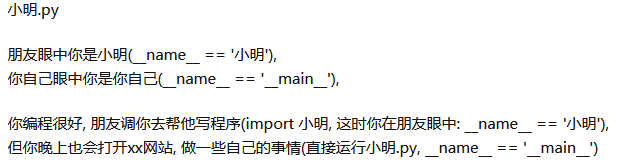
more:（1）https://www.zhihu.com/question/49136398；<br>
  （2）http://www.baidu.com/link?url=hj-2mDGRqEjmggr_G2x0u3rMuMVnK8v4VBNVmJJmCdajcezw75q-105sFeU2OKkX4IdKXmAya4S-sKQgwDsl7Pw-jTD9-Y59eoIGKbDSjSG&wd=&eqid=f26a169a0005bf0f00000003601941bb；<br>